# SC qubits - testing the sc_qubits module (v2)

## Initialization (load modules etc.)

In [1]:
%pylab inline

from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import sc_qubits2 as qubit  # import the superconducting circuit module
import plotting as plot

from qutip import *

Populating the interactive namespace from numpy and matplotlib


## The Transmon and Cooper pair box

$H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2+\frac{1}{2}E_\text{J}(|n\rangle\langle n+1|+\text{h.c.})$

In [2]:
CPB = qubit.Transmon(
    EJ=30.02,
    EC=1.2,
    ng=0.3,
    ncut=31
    )


[====================] 100% Done.


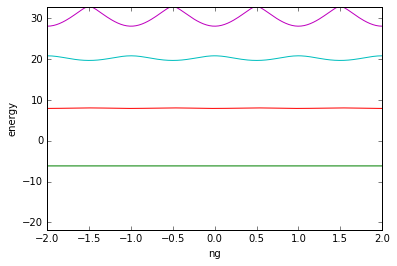

In [3]:
ng_list = np.linspace(-2, 2, 220)
CPB.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False)#, filename="./data/CPB_E_vs_ng")

In [4]:
ng_list = np.linspace(-2, 2, 220)
tst = CPB.get_spectrum_vs_paramvals('ng', ng_list, evals_count=4, subtract_ground=False, get_eigenstates=True, filename='./data/tst')


[====================] 100% Done.



[====================] 100% Done.


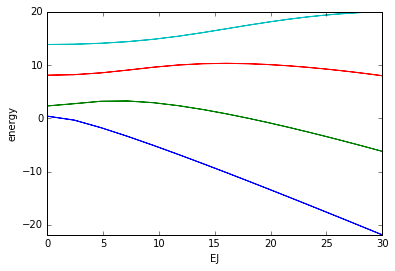

In [5]:
CPB.ng = 0.3
ej_vals = CPB.EJ * np.cos(np.linspace(-pi/2, pi/2, 40))
CPB.plot_evals_vs_paramvals('EJ', ej_vals, evals_count=4, subtract_ground=False)

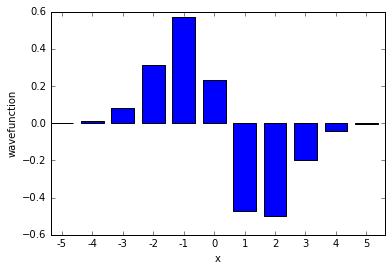

In [6]:
CPB.plot_n_wavefunction(esys=None, which=1, mode='real')

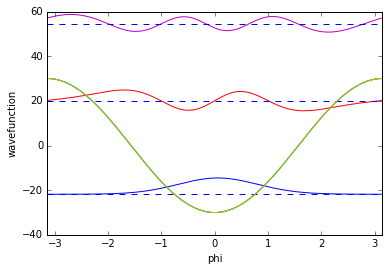

In [7]:
CPB.plot_phi_wavefunction(esys=None, which=(0,3,6), mode='real')

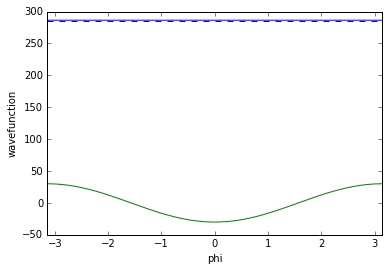

In [8]:
CPB.plot_phi_wavefunction(esys=None, which=15, mode='abs_sqr')

### Charge matrix elements

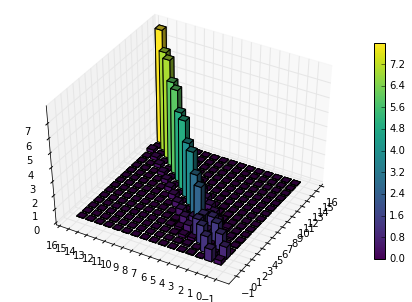

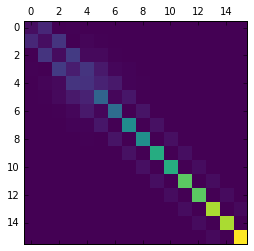

In [9]:
CPB.EJ  = 30
CPB.ncut = 80
nmat = CPB.matrixelement_table('n_operator', esys=None, evals_count=16)
plot.matrixelements(nmat, mode='abs')

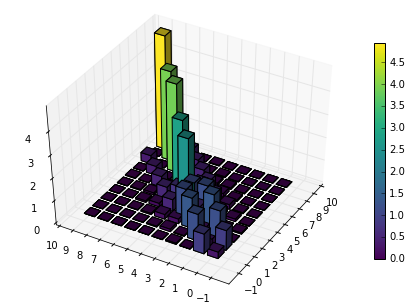

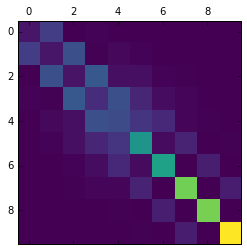

In [10]:
CPB.plot_matrixelements('n_operator', evals_count=10)

## Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

In [12]:
fluxonium = qubit.Fluxonium(
    EJ = 8.9,
    EC = 2.5,
    EL = 0.5,
    flux = 0.33,
    cutoff = 110
)

In [13]:
fluxonium

fluxonium -- PARAMETERS -------
EC	: 2.5
EJ	: 8.9
EL	: 0.5
cutoff	: 110
flux	: 0.33
Hilbert space dimension	: 110

In [5]:
fluxonium.eigenvals()

array([ -3.30851586,  -0.23733983,   6.9133453 ,  10.55323546,
        11.76215604,  16.12300682])


[====================] 100.0% Done.


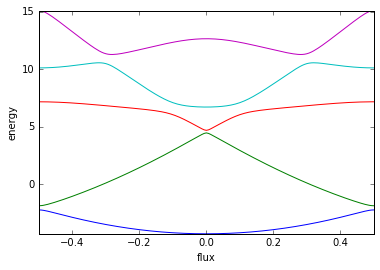

In [4]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5)


[====================] 100.0% Done.


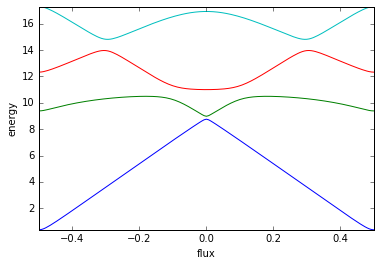

In [5]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True)

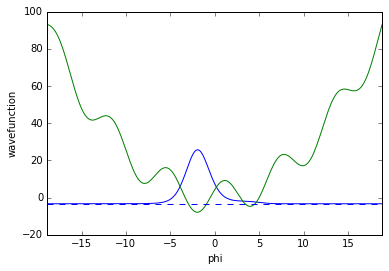

In [9]:
fluxonium.plot_wavefunction(esys=None, which=0, mode='real')

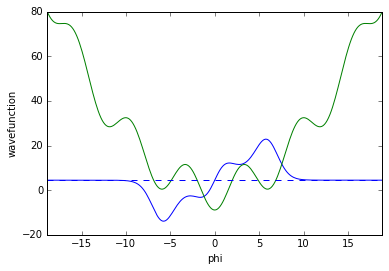

In [13]:
fluxonium.plot_wavefunction(esys=None, which=1, mode='real')

### Matrix elements

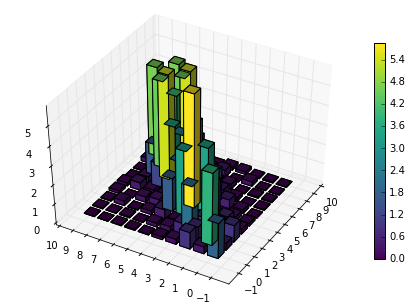

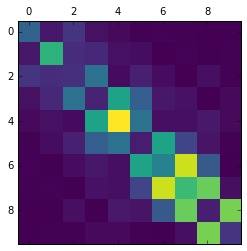

In [14]:
phimat = fluxonium.matrixelement_table('phi_operator', esys=None, evals_count=10)
plot.matrixelements(phimat)

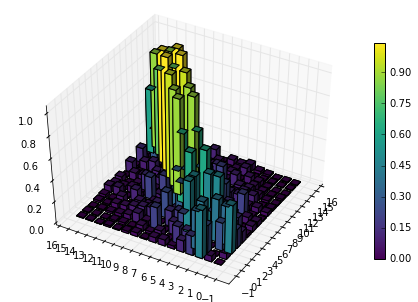

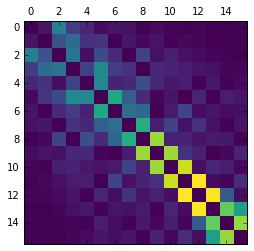

In [16]:
fluxonium.plot_matrixelements('n_operator', evals_count=16)

## The symmetric $0-\pi$ qubit (no coupling to the $\chi$-mode)

$H_\text{sym}=-2E_\text{CJ}\partial_\phi^2-2E_{\text{C}\Sigma}\partial_\theta^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J}$

In [10]:
# parameters for the 0-\pi circuit

phitheta_grid = qubit.Grid(
    np.asarray([ 
        [-6*pi, 6*pi, 100], # phi variable
        [-pi/2, 3*pi/2, 40]   # theta variable (2pi periodic!)
    ])
    )



EJ_CONST = 1/3.95  # note that EJ and ECJ are interrelated

zero_pi = qubit.SymZeroPi(
    grid = phitheta_grid,
    EJ   = EJ_CONST,
    EL   = 10.0**(-2),
    ECJ  = 1/(8.0*EJ_CONST),
    ECS  = 10.0**(-3),
    flux = 0
)

In [11]:
zero_pi

symmetric 0-Pi qubit (zero offset charge) -- PARAMETERS -------
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.01
flux	: 0
grid	:     Grid ......
max_vals	: [ 18.84955592   4.71238898]
min_vals	: [-18.84955592  -1.57079633]
pt_counts	: [ 100.   40.]
var_count	: 2
Hilbert space dimension	: 4000

### Potential energy for symmetric 0-$\pi$ qubit

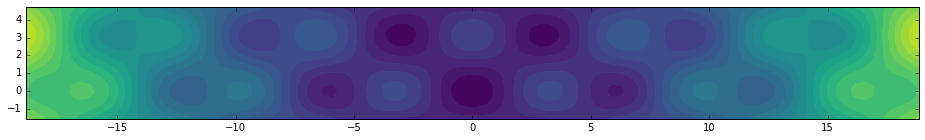

In [18]:
# zero_pi.plot_potential(countour_vals=linspace(0,2,20), aspect_ratio=0.12, filename="potential.pdf")
zero_pi.plot_potential(contour_vals=linspace(0,5,25), aspect_ratio=0.12)

### Eigenenergies

In [19]:
zero_pi.flux = 0.23
evals = zero_pi.eigenvals()

In [20]:
evals

array([ 0.46098945,  0.49160704,  0.50316139,  0.52006088,  0.53226832,
        0.54625832])


[====================] 100.0% Done.


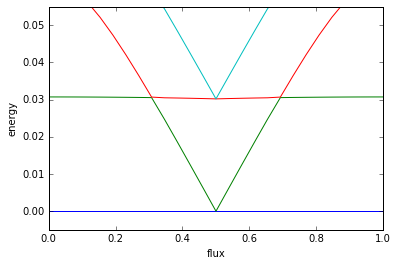

In [22]:
flux_list = np.linspace(0, 1, 27)
zero_pi.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=True, yrange=[-0.005,0.055])
# zero_pi.plot_evals_vs_paramvals('flux', flux_list, shift=-evals[0], filename="./data/0pi_sym")

# zero_pi.plot_evals_vs_paramvals('flux', flux_list, shift=-evals[0], yrange=[-0.005,0.055], filename="./data/0pi_sym")

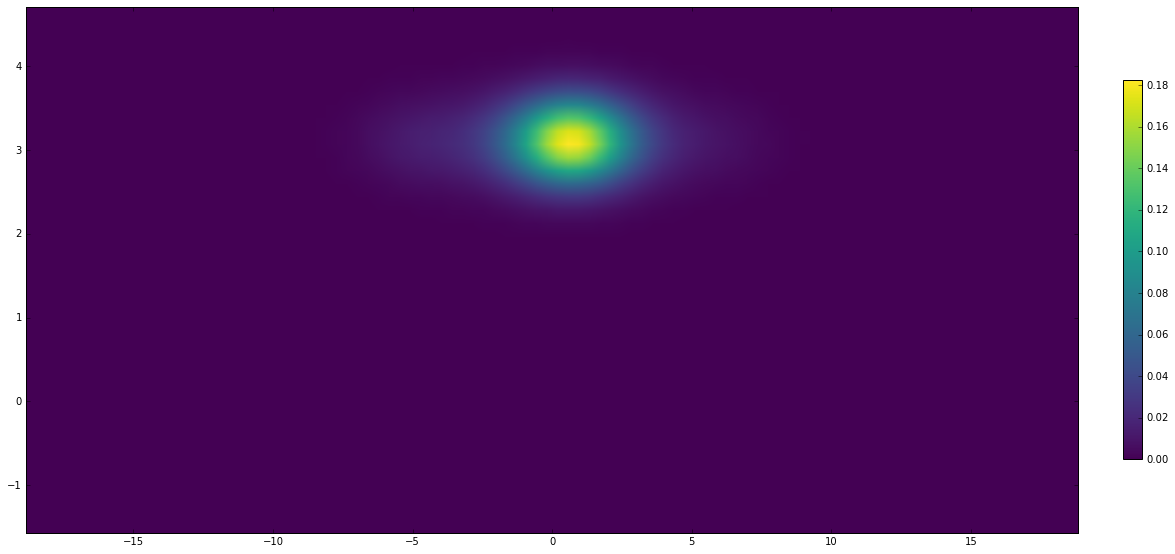

In [27]:
esys = zero_pi.eigensys()
zero_pi.plot_wavefunction(esys, which=0, mode='abs')

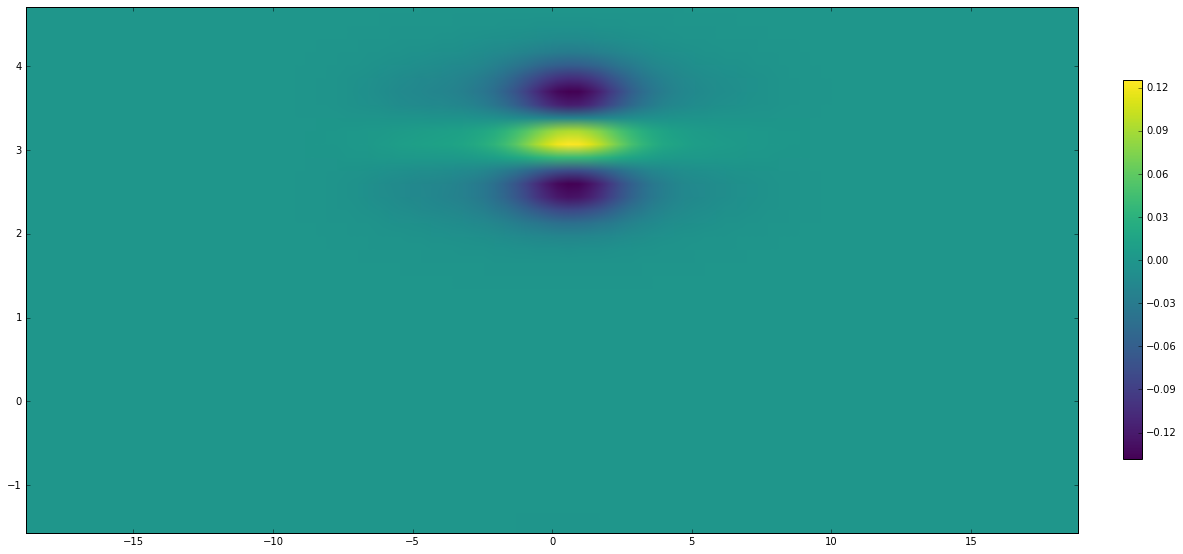

In [30]:
zero_pi.plot_wavefunction(esys=None, which=3, mode='real')

## The symmetric $0-\pi$ qubit with offset charge (no coupling to the $\chi$-mode)

$H_\text{sym}=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J}$

In [2]:
# parameters for the 0-\pi circuit

phitheta_grid = qubit.Grid(
    np.asarray([ 
        [-8*pi, 8*pi, 200], # phi variable
        [-pi/2, 3*pi/2, 40]   # theta variable (2pi periodic!)
    ])
    )



EJ_CONST = 1/3.95  # note that EJ and ECJ are interrelated

zero_pi_ng = qubit.SymZeroPiNg(
    grid = phitheta_grid,
    EJ   = EJ_CONST,
    EL   = 10.0**(-3),
    ECJ  = 1/(8.0*EJ_CONST),
    ECS  = 10.0**(-3),
    flux = 0.11,
    ng   = 0.2
)

In [32]:
evals=zero_pi_ng.eigenvals()

In [33]:
evals

array([ 0.42794314,  0.42883383,  0.45647845,  0.45723624,  0.46916054,
        0.47853736])

Note: the range in $n_g$ that converges is intimately related to the grid spacing along the $\theta$ direction. To appreciate this, remember that wavefunctions for $n_g=0$ and $n_g=1$ are identical except additional phase wrapping for the latter. This phase wrapping becomes faster and faster with $n_g$. (Specifically, the phase factor is $e^{i n_g \theta}$.)


[====================] 100.0% Done.


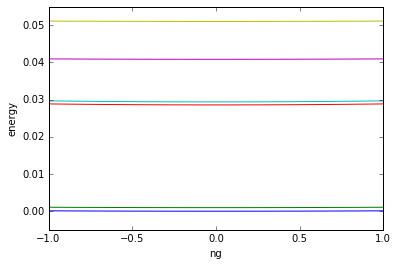

In [8]:
zero_pi_ng.flux = 0.0
zero_pi_ng.ng = 0.0

evals=zero_pi_ng.eigenvals(1)
ng_list = np.linspace(-1, 1, 12)
zero_pi_ng.plot_evals_vs_paramvals('ng', ng_list, shift=-evals[0], yrange=[-0.005,0.055])

In [3]:
_, evecs = zero_pi_ng.eigensys(evals_count=2)
evecs_calculated = evecs.T[1][4000:4100]

### Plotting wave functions

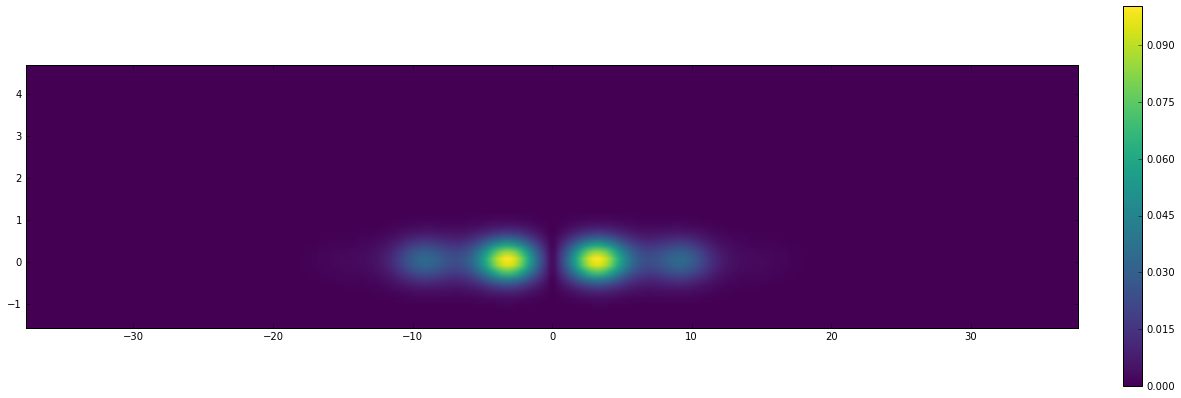

In [9]:
zero_pi_ng.ng = 0.355
esys = zero_pi_ng.eigensys(10)

zero_pi_ng.plot_wavefunction(esys, which=4, mode='abs')

## The full $0−\pi$ qubit including disorder-induced coupling to χ-mode

$H = H_\text{sym}
+4E_{C\Sigma}(\delta C_J/C_J)\partial_\phi\partial_\theta +2\,\delta E_J \sin\theta\sin(\phi-\phi_\text{ext}/2)\\
\quad-2E_C\partial_\chi^2+E_L \chi^2+4E_{C\Sigma}(\delta C/C)\partial_\theta\partial_\chi+2\,\delta E_L \phi\, \chi$

In [2]:
# grid specifications
grid3d = qubit.Grid(
    np.asarray([ 
        [-7*pi, 7*pi, 65],   # phi variable
        [-pi/2, 3*pi/2, 35], # theta variable (2pi periodic!)
        [-10.0, 10.0, 70]    # chi variable
    ])
    )


# parameters for the modified 0-\pi circuit
EJ_CONST  = 1/3.95
ECJ_CONST = 1/(8.0*EJ_CONST)
ECS_CONST = 10.0**(-3)

zeropi_full = qubit.FullZeroPi(
    grid = grid3d,
    EJ  = EJ_CONST,
    dEJ = 0.05,
    EL  = 10.0**(-3),
    dEL = 0.05,
    ECJ = ECJ_CONST,
    dCJ = 0.05,
    ECS = ECS_CONST,
    EC  = 1/(1/ECS_CONST-1/ECJ_CONST),
    dC  = 0.08,
    flux = 0
)

In [3]:
zeropi_full

full 0-Pi circuit (phi, theta, chi), no offset charge -- PARAMETERS -------
EC	: 0.00100202942669
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
dC	: 0.08
dCJ	: 0.05
dEJ	: 0.05
dEL	: 0.05
flux	: 0
grid	:     Grid ......
max_vals	: [ 21.99114858   4.71238898  10.        ]
min_vals	: [-21.99114858  -1.57079633 -10.        ]
pt_counts	: [ 65.  35.  70.]
var_count	: 3
Hilbert space dimension	: 159250

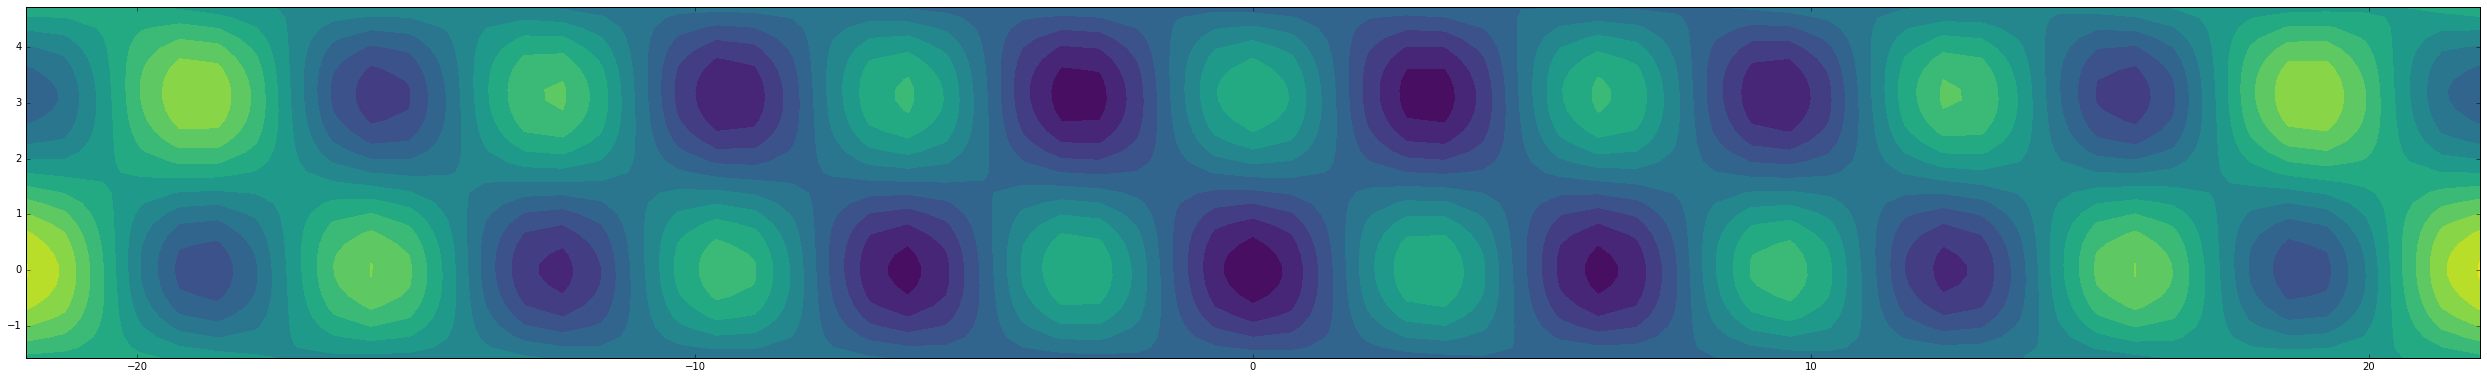

In [4]:
# zeropi_full.plot_potential('theta', 0.0, levels=linspace(0,1.63,20))
zeropi_full.plot_potential('chi', 0.0, contour_vals=linspace(0,1.63,15))

In [6]:
ev0 = zeropi_full.eigenvals(evals_count=2)
print(ev0[0])

0.453696754936


In [ ]:
flux_list = np.linspace(0, 2*pi, 27)
zeropi_full.plot_evals_vs_paramvals('flux', flux_list, evals_count=40, shift=-ev0[0], filename="./data/0pifull_E_vs_flux")

In [21]:
# evals, evecs = zeropi_full.eigensys(40, filename="./data/0pi_disordered")
evals, evecs = zeropi_full.eigensys(evals_count=3)

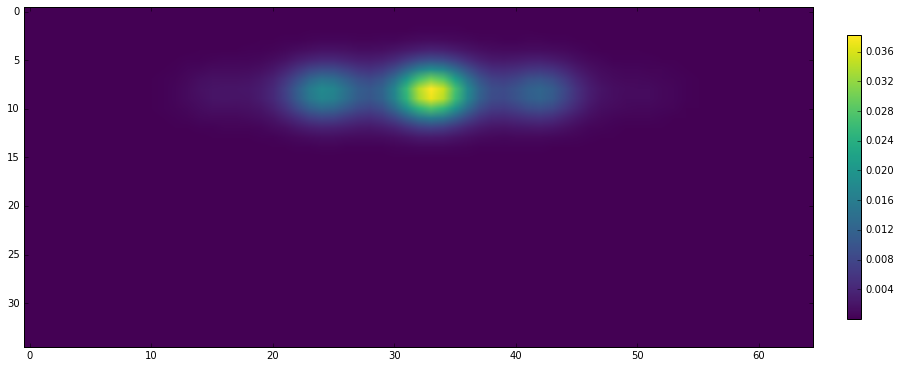

In [23]:
zeropi_full.plot_wavefunction(esys=(evals,evecs), fixedvar_name='chi', fixedvar_val=-0.5, which=2, mode='real', figsize=(15,15), aspect_ratio=0.8)

Note: for the parameters chosen here (and similar to what the "ideal" 0-pi device should have), it is evident that spatial discretization is problematic for the $\chi$ degree of freedom. This degree is so low-energetic that it will acquire a large number of nodes/antinodes before other excitations occur. These nodes/antinodes will be densely spaced, going beyond the spatial discretization and hence causing errors (seen as deviations from equidistant spacing of energy levels for the case without disorder).

## $0-\pi$ qubit with disorder in $E_J$ and $E_C$ ($\chi$ remains decoupled)

$H = H_\text{sym}
+4E_{C\Sigma}(\delta C_J/C_J)\partial_\phi\partial_\theta +2\,\delta E_J \sin\theta\sin(\phi-\phi_\text{ext}/2)$

In [7]:
phitheta_grid = qubit.Grid(
    np.asarray([ 
        [-8*pi, 8*pi, 360],  # phi variable
        [-pi/2, 3*pi/2, 55] # theta variable (periodic!)
    ])
    )


# parameters
EJ_CONST = 1/3.95

zeropi_dis = qubit.DisZeroPi(
    grid = phitheta_grid,
    EJ  = EJ_CONST,
    dEJ = 0.1,
    EL  = 10.0**(-3),
    ECJ = 1 / (8.0*EJ_CONST),
    dCJ = 0.1,
    ECS  = 10.0**(-3),
    flux = 0
)

In [8]:
zeropi_dis

0-Pi qubit with EJ and CJ disorder, no coupling to chi mode (zero offset charge) -- PARAMETERS -------
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
dCJ	: 0.1
dEJ	: 0.1
flux	: 0
grid	:     Grid ......
max_vals	: [ 25.13274123   4.71238898]
min_vals	: [-25.13274123  -1.57079633]
pt_counts	: [ 360.   55.]
var_count	: 2
Hilbert space dimension	: 19800

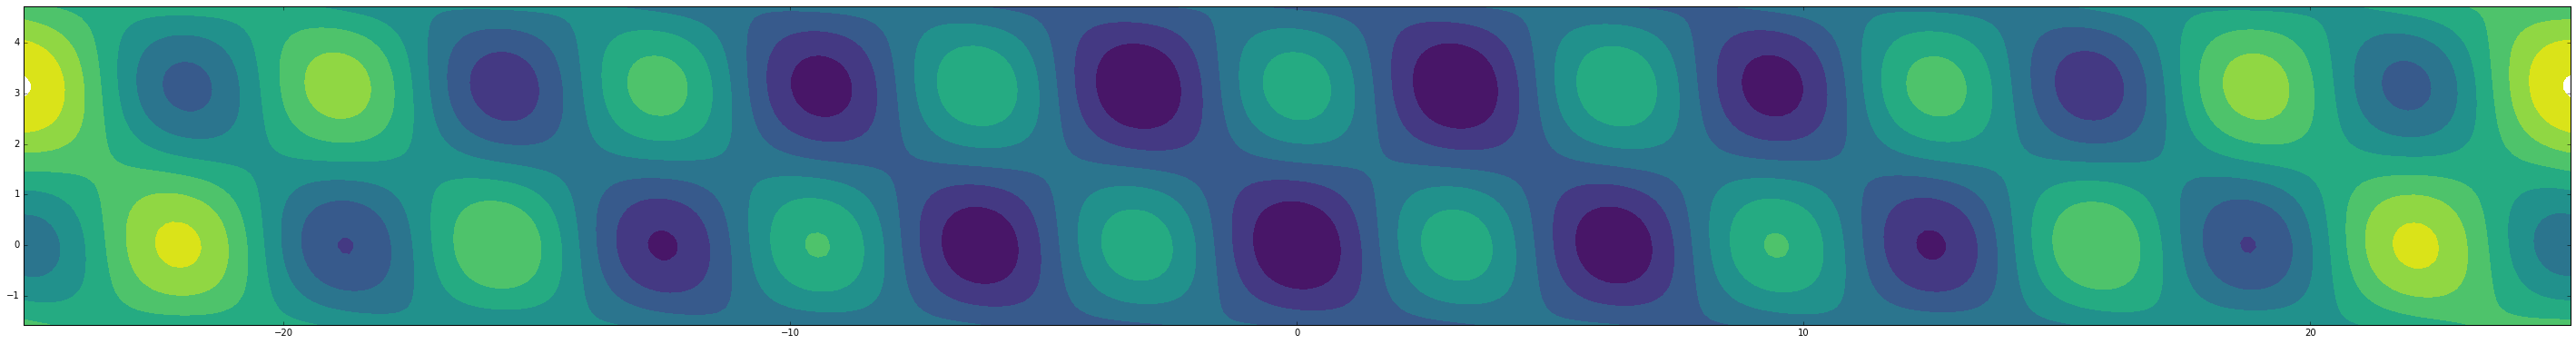

In [9]:
zeropi_dis.plot_potential(contour_vals=linspace(0,1.63,10))

In [10]:
evals = zeropi_dis.eigenvals(evals_count=4)
print(evals)

[ 0.42765344  0.42861587  0.45614867  0.45696385]


In [ ]:
flux_list = np.linspace(0, 2*pi, 27)
zeropi_dis.plot_evals_vs_paramvals('flux', flux_list, shift=-evals[0], yrange=[-0.005,0.055], filename="./data/0pi_dis_E_vs_flux")

Note: as soon as $E_J$ disorder is included, the potential is not perfectly symmetric w.r.t. $\phi=0$ anymore, so small matrix elements between same-rung wavefunctions with nominally same parity are to be expected.

## Full $0-\pi$ circuit in product basis (all disorder types and coupling to $\chi$ mode)

In [11]:
phitheta_grid = qubit.Grid(
    np.asarray([ 
        [-8*pi, 8*pi, 360],  # phi variable
        [-pi/2, 3*pi/2, 55] # theta variable (periodic!)
    ])
    )

# parameters for the modified 0-\pi circuit
EJ_CONST  = 1/3.95
ECJ_CONST = 1/(8.0*EJ_CONST)
ECS_CONST = 10.0**(-3)

zpifull = qubit.FullZeroPi_ProductBasis(
    zeropi_cutoff = 10,
    chi_cutoff = 40,
    grid = phitheta_grid,
    EJ  = EJ_CONST,
    dEJ = 0.05,
    EL  = 10.0**(-3),
    dEL = 0.05,
    ECJ = ECJ_CONST,
    dCJ = 0.05,
    ECS = ECS_CONST,
    EC  = 1/(1/ECS_CONST-1/ECJ_CONST),
    dC  = 0.08,
    flux = 0
)

In [12]:
zpifull

full 0-Pi circuit (phi, theta, chi) in 0pi - chi product basis -- PARAMETERS -------
EC	: 0.00100202942669
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
chi_cutoff	: 40
dC	: 0.08
dCJ	: 0.05
dEJ	: 0.05
dEL	: 0.05
flux	: 0
grid	:     Grid ......
max_vals	: [ 25.13274123   4.71238898]
min_vals	: [-25.13274123  -1.57079633]
pt_counts	: [ 360.   55.]
var_count	: 2
zeropi_cutoff	: 10
Hilbert space dimension	: 400

In [22]:
evals2 = zpifull.eigenvals(evals_count=40)
evals2 - evals2[0]

array([ 0.        ,  0.00096145,  0.00281964,  0.00377939,  0.00563929,
        0.00659733,  0.00845894,  0.00941528,  0.01127859,  0.01223322,
        0.01409825,  0.01505117,  0.01691791,  0.01786912,  0.01973757,
        0.02068707,  0.02255724,  0.02350502,  0.02537691,  0.02632298,
        0.02819659,  0.02861525,  0.02914094,  0.02942929,  0.03101627,
        0.03143803,  0.0319589 ,  0.03224781,  0.03383596,  0.03426082,
        0.03477686,  0.03506636,  0.03665565,  0.03708363,  0.03759483,
        0.03788496,  0.03947534,  0.03990647,  0.04041279,  0.0407036 ])

### Matrix elements $g_{ll'}$ [Dempster et al., text immediately above Eqs. (17) & (18)]

In [13]:
ev_count = 10
gmat = zpifull.g_coupling_matrix(None, evals_count=ev_count)

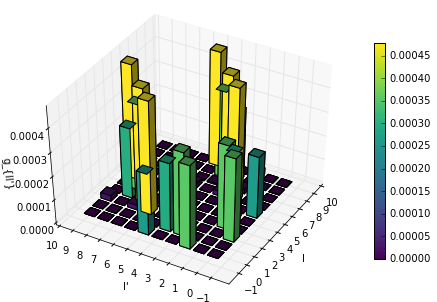

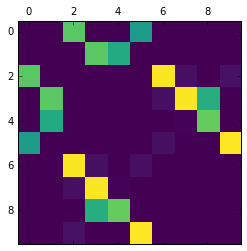

In [14]:
plot.matrixelements(gmat, xlabel="l", ylabel="l'", zlabel="g_{ll'}")

# Interfacing with qutip

## Example: two Cooper pair boxes coupled to one resonator mode
$\displaystyle H=\sum_{\alpha=1,2}\sum_{j} E_j^{(\alpha)}|\alpha j\rangle\langle \alpha j| + \omega_r a^\dagger a + \sum_{\alpha=1,2}\sum_{j,k}g^{(\alpha)}_{jk} |\alpha j\rangle \langle \alpha k|(a+a^\dagger)$

### Define Hilbert space components, Hilbert space tuple, and system operators

In [13]:
# Set up the components / subspaces of our Hilbert space
# Objects may be taken from sc_qubits; for resonators or other
# elements not covered, the class GenericQSys is provided in
# the qubitwrapper module

CPB1 = qubit.Transmon(
    EJ = 40.0,
    EC = 0.2,
    ng = 0.3,
    ncut = 40,
    truncated_dim = 3     # after diagonalization, we will keep 3 levels
)

CPB2 = qubit.Transmon(
    EJ = 3.0,
    EC = 1.0,
    ng = 0.0,
    ncut = 10,
    truncated_dim = 4
)

resonator = qubit.Oscillator(
    omega = 6.0,
    truncated_dim=4  # up to 3 photons (0,1,2,3)
)


# Form a list of all components making up the Hilbert space.
hilbertspc = qubit.HilbertSpace([CPB1, CPB2, resonator])

In [14]:
# Get resonator Hamiltonian (full product Hilbert space)
hres = hilbertspc.diag_hamiltonian(resonator)

# Get diagonalized CPB1 Hamiltonian as full-system operator via tensor product with identities.
h1 = hilbertspc.diag_hamiltonian(CPB1)

# Get diagonalized CPB2 Hamiltonian as full-system operator via tensor product with identities.
h2 = hilbertspc.diag_hamiltonian(CPB2)

### Additional system parameters

In [15]:
g1 = 0.1  # coupling resonator-CPB1 (without charge matrix elements)
g2 = 0.2  # coupling resonator-CPB2 (without charge matrix elements)

dim1 = CPB1.truncated_dim
dim2 = CPB2.truncated_dim

_, evecs1 = CPB1.eigensys(dim1)
_, evecs2 = CPB2.eigensys(dim2)
gmat1 = g1 * qubit.matrixelem_table(CPB1.n_operator(), evecs1)   # coupling constants for CPB1
gmat2 = g2 * qubit.matrixelem_table(CPB2.n_operator(), evecs2)   # and for CPB2

In [16]:
hbd = hilbertspc.hubbard_operator

a = hilbertspc.annihilate(resonator)

hamiltonian0 = h1 + h2 + hres

vcpb1 = sum([gmat1[j][k] * hbd(j,k,CPB1) for j in range(dim1) for k in range(dim1)])
vcpb2 = sum([gmat2[j][k] * hbd(j,k,CPB2) for j in range(dim2) for k in range(dim2)])

hamiltonian1 = (vcpb1 + vcpb2) * (a + a.dag())

hamiltonian = hamiltonian0 + hamiltonian1

In [17]:
esys = hamiltonian.eigenstates()

In [18]:
# Example: spectrum when varying the Josephson energy of CPB1 via a flux
# Set up Hamiltonian:

ham0 = h2 + hres

vcpb2 = sum([gmat2[j][k] * hbd(j,k,CPB2) for j in range(dim2) for k in range(dim2)])

def hamiltonian(flux):
    CPB1.EJ = 40.0 * cos(pi*flux)
    h1 = hilbertspc.diag_hamiltonian(CPB1)
    vcpb1 = sum([gmat1[j][k] * hbd(j,k,CPB1) for j in range(dim1) for k in range(dim1)])
    
    return (h1 + ham0 + (vcpb1 + vcpb2) * (a + a.dag()))

In [19]:
flux_list = np.linspace(-0.1, 0.6, 100)
specdata = hilbertspc.get_spectrum_vs_paramvals(hamiltonian, flux_list, evals_count=15, get_eigenstates=True)


[====================] 100% Done.


In [20]:
specdata.energy_table[2]

array([-35.61671109, -30.87536252, -29.93935539, -29.62839549,
       -27.95521996, -24.89469034, -23.95779031, -23.64010506,
       -23.21389138, -22.27788515, -21.97003287, -20.49827277,
       -18.91372364, -18.6059474 , -17.97609201])

In [9]:
absorptiondata = hilbertspc.absorption_spectrum(specdata, ((CPB1, 0), (CPB2, 0), (resonator, 0)), initial_as_bare=True)


[====================] 100% Done.


In [21]:
absorptiondata.energy_table[5]

array([  0.        ,   4.74135306,   5.67735204,   5.9888575 ,
         7.72433769,  10.72256729,  11.6594581 ,  11.97768947,
        12.46567274,  13.40167088,  13.71033926,  15.24394963,
        16.70406082,  17.01076357,  17.64169146])

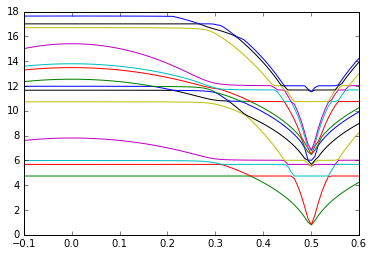

In [10]:
absorptiondata.plot()

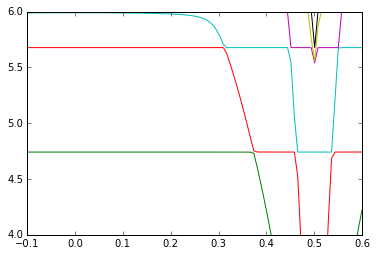

In [33]:
plt.plot(flux_list, specdata)
plt.ylim(4,6)
plt.show()